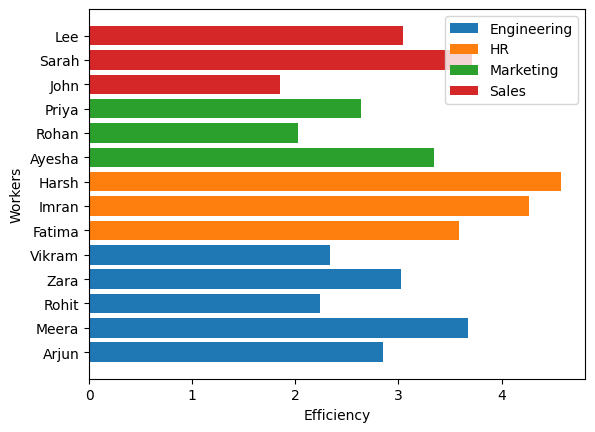

                     Salary  Experience       Age    Rating  \
Salary             1.000000   -0.200360 -0.176941  0.578563   
Experience        -0.200360    1.000000  0.830206  0.069230   
Age               -0.176941    0.830206  1.000000  0.185778   
Rating             0.578563    0.069230  0.185778  1.000000   
Salary_Normalized  0.560024    0.322174  0.398250  0.546960   
Efficiency        -0.011270    0.966361  0.841108  0.295810   

                   Salary_Normalized  Efficiency  
Salary                      0.560024   -0.011270  
Experience                  0.322174    0.966361  
Age                         0.398250    0.841108  
Rating                      0.546960    0.295810  
Salary_Normalized           1.000000    0.523456  
Efficiency                  0.523456    1.000000  


<Axes: >

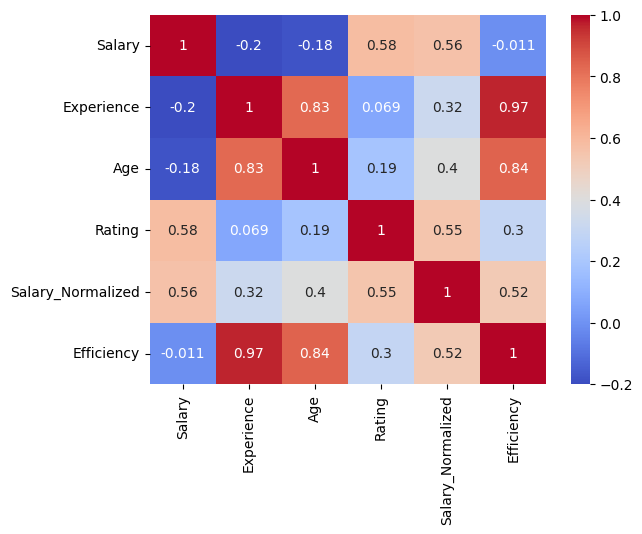

In [113]:
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = Path("Practice_Materials")
df = pd.read_csv(path / "datav2.csv")
df = df.replace('120k', 120000)
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df.columns = df.columns.str.strip()
df = df.replace('four',4)
df = df.replace('2 years',2)
df = df.replace('5 yrs',5)
df = df.replace('abc', np.nan)
cols = ["Salary","Experience","Age","Rating"]
int_cols = ["Salary","Experience","Age"]
for col in cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

for col in cols:
    df[col] = df[col].fillna(df.groupby('Department')[col].transform('mean'))

df[int_cols] = df[int_cols].astype(int)
df = df.sort_values(by="Department")
min_salary = df.groupby("Department")[cols[0]].transform('min')
max_salary = df.groupby("Department")[cols[0]].transform('max')
df["Salary_Normalized"] = (df["Salary"]-min_salary)/(max_salary-min_salary)
df['Efficiency'] = ((0.4*df["Experience"]+
                     0.3*df["Rating"])+
                     0.3*df["Salary_Normalized"])
best_performers = df.loc[df.groupby("Department")["Efficiency"].idxmax()]
for dept in df["Department"].unique():
    sub = df.loc[df["Department"] == dept,:]
    plt.barh(sub["Name"], sub["Efficiency"],label=dept)
plt.ylabel("Workers")
plt.xlabel("Efficiency")
plt.legend()
plt.show()
cols = list(df.columns)
cols.remove("Name")
cols.remove("Country")
cols.remove("Department")
corr = df[cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")